### Importing libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merging 12 months of data into single file

In [2]:
df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
all_mth_data = pd.DataFrame()

files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]
for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_mth_data = pd.concat([all_mth_data,df])
    
all_mth_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_mth_data.shape

(186850, 6)

### Read updated dataframe

In [6]:
all_mth_data.to_csv("all_data.csv", index=False)

In [7]:
total_df = pd.read_csv("./all_data.csv")
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Some Data wrangling

#### Remove NaN

In [8]:
nan_df = total_df[total_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
total_df = total_df.dropna(how="all")   #the how="all" argument will drop rows where ALL values are NaN. 

#### Find and remove rows where first 2 characters of 'Order Date' column = 'Or'
##### This issue arose when we merged all the data together, including the headers
##### we first verify that issue actually exists, then remove the rows

In [10]:
tempdf = total_df[total_df['Order Date'].str[0:2] == 'Or']
tempdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Removing the unecessary rows

In [11]:
total_df = total_df[total_df['Order Date'].str[0:2] != 'Or']

#### 
#### Adding month column (to answer qn 1)

In [12]:
total_df["Month"] = total_df["Order Date"].str[0:2]
total_df["Month"] = total_df["Month"].astype('int32')
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Adding Sales column (to answer qn 1)

In [13]:
total_df['Sales'] = total_df['Quantity Ordered'].astype('float64')*total_df['Price Each'].astype('float64')
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Adding city column (to answer qn 2)

In [14]:
total_df['City'] = total_df['Purchase Address'].apply(lambda x: f"{x.split(', ')[1]} ({x.split(', ')[2].split(' ')[0]})")  #seems like apply() and lambda are used together
total_df.head()

#can use lambda x if you're editing cell content..

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Adding hour, minutes column (to answer qn 3)

In [17]:
total_df['Order Date'] = pd.to_datetime(total_df['Order Date'])
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [16]:
total_df['Hour'] = total_df['Order Date'].dt.hour
total_df['Minutes'] = total_df['Order Date'].dt.minute

total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


### Analytical questions
#### (1) What was the best month for sales, and how much was earned during that month?

In [16]:
results = total_df.groupby('Month').sum()
results

C:\Users\cutho\AppData\Local\Temp\ipykernel_115788\2545363550.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = total_df.groupby('Month').sum()


,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


Text(0, 0.5, 'Total Sales in USD')

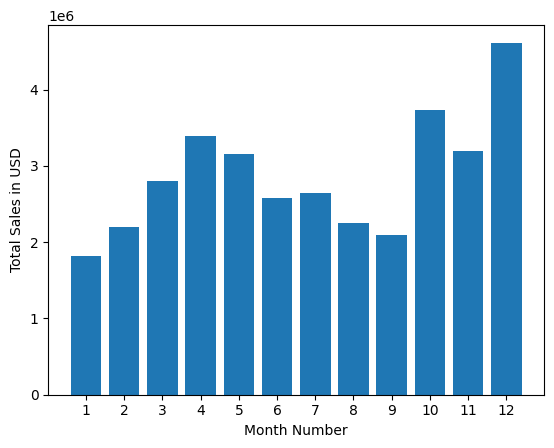

In [20]:

plt.bar(range(1,13), results['Sales'])  #not sure why can't results['Month'], used range instead
plt.xticks(range(1,13))
plt.xlabel('Month Number')
plt.ylabel('Total Sales in USD')

#### (2) Which US city had the highest number of sales?

In [29]:
results2 = total_df.groupby('City').sum()
results2

C:\Users\cutho\AppData\Local\Temp\ipykernel_115788\2062420478.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results2 = total_df.groupby('City').sum()


,Month,Sales
City,,
Atlanta (GA),104794,2795498.58
Austin (TX),69829,1819581.75
Boston (MA),141112,3661642.01
Dallas (TX),104620,2767975.40
Los Angeles (CA),208325,5452570.80
New York City (NY),175741,4664317.43
Portland (ME),17144,449758.27
Portland (OR),70621,1870732.34
San Francisco (CA),315520,8262203.91


Text(0, 0.5, 'Total Sales in USD')

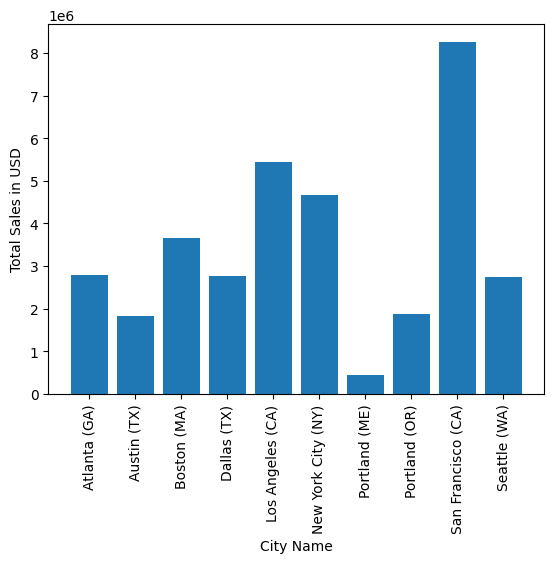

In [33]:
#cities = total_df['City'].unique() <- If u do this, the city would not be ordered the same as results2['Sales']

cities = [city for city, df in total_df.groupby('City')]

plt.bar(cities, results2['Sales']) 
plt.xticks(cities, rotation='vertical')
plt.xlabel('City Name')
plt.ylabel('Total Sales in USD')

#### (3) What's the best time to display advertisements to maximize the likelihood of cutomer buying products?

Text(0, 0.5, 'Number of orders')

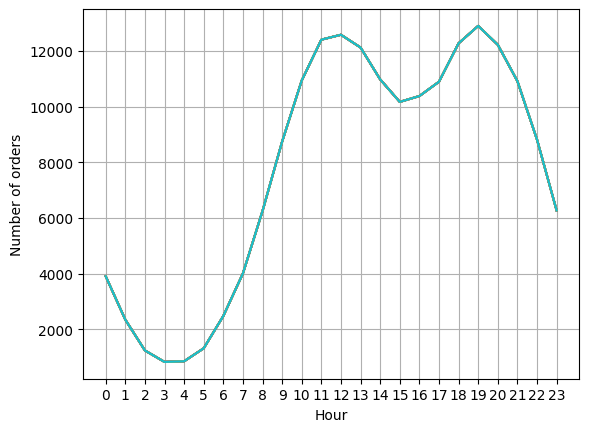

In [38]:
 hours = [hour for hour, df in total_df.groupby('Hour')]

plt.plot(hours, total_df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of orders')

#Can propose to advertise just befor 1100 and 1900hrs because those are the peak periods for customer purchases

#### (4) What products are most often sold together?

In [18]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [20]:
subdf1 = total_df[total_df['Order ID'].duplicated(keep=False)]
subdf1['Grouped'] = subdf1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
subdf1.head()

C:\Users\cutho\AppData\Local\Temp\ipykernel_92600\2904250809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf1['Grouped'] = subdf1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Grouped
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [22]:
subdf1 = subdf1[['Order ID','Grouped']].drop_duplicates()
subdf1.head(12)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [25]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in subdf1['Grouped']:
    row_list = row.split(',')                               #according to stackoverflow solution, need to get a list 
    count.update(Counter(combinations(row_list, 2)))        #the 2nd argument in combinations() gives u the count of diff combos

for key,value in count.most_common(30):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

#### (5) What product sold the most and why do you think it's the bestseller?

In [26]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [34]:
total_df['Quantity Ordered'] = pd.to_numeric(total_df['Quantity Ordered'])
subdf2 = total_df.groupby('Product')[['Product','Quantity Ordered']].sum()
subdf2.head()

C:\Users\cutho\AppData\Local\Temp\ipykernel_92600\1120302083.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subdf2 = total_df.groupby('Product')[['Product','Quantity Ordered']].sum()


,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635


Text(0, 0.5, 'Number of orders')

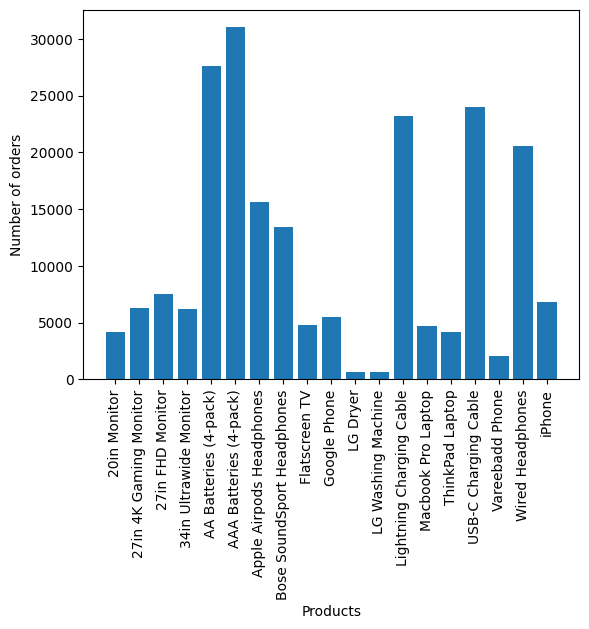

In [39]:
qty = subdf2['Quantity Ordered']
prod = [prod for prod, df in subdf2.groupby('Product')]    #not sure why need to use .groupby().. can't just use index?

plt.bar(prod,qty)
plt.xticks(prod, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Number of orders')

#batteries seem to be most popular item, could it be due to price?

In [44]:
prices = total_df.groupby(['Product','Price Each']).mean()
prices.head()

C:\Users\cutho\AppData\Local\Temp\ipykernel_92600\1254224971.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = total_df.groupby(['Product','Price Each']).mean()


,,Quantity Ordered,Month,Sales,Hour,Minutes
Product,Price Each,,,,,
20in Monitor,109.99,1.006828,7.153377,110.740968,14.329188,29.810290
27in 4K Gaming Monitor,389.99,1.002247,7.133226,390.866382,14.593258,29.587640
27in FHD Monitor,149.99,1.005728,7.001199,150.849141,14.325296,29.299054
34in Ultrawide Monitor,379.99,1.002912,7.005986,381.096588,14.411260,29.684517
AA Batteries (4-pack),3.84,1.343004,7.073820,5.157137,14.498809,29.598046


In [56]:
total_df['Price Each'] = pd.to_numeric(total_df['Price Each'])
prices = total_df.groupby(['Product']).mean()['Price Each']
prices.head()

C:\Users\cutho\AppData\Local\Temp\ipykernel_92600\859079650.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = total_df.groupby(['Product']).mean()['Price Each']


Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

C:\Users\cutho\AppData\Local\Temp\ipykernel_92600\2774600473.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod, rotation='vertical')


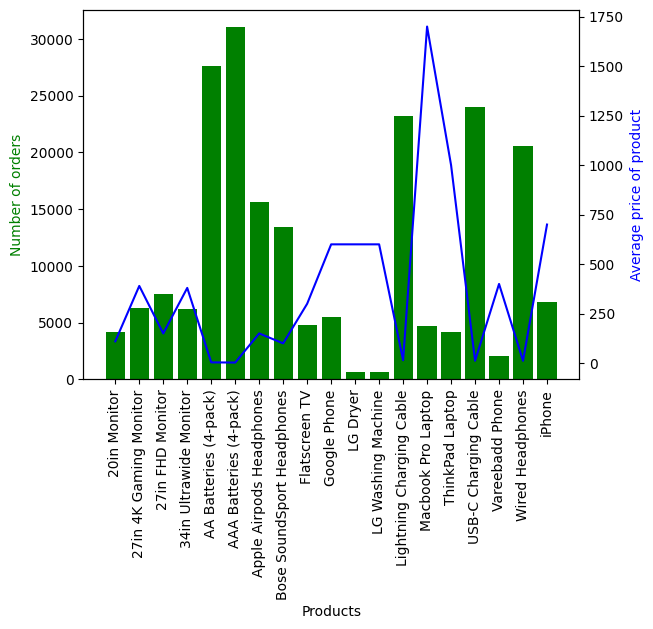

In [62]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prod,qty, color='g')
ax2.plot(prod,prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Number of orders', color='g')
ax2.set_ylabel('Average price of product', color='b')
ax1.set_xticklabels(prod, rotation='vertical')
plt.show()